In [1]:
from sklearn.datasets import load_wine
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
wine=load_wine()

In [36]:
X=wine.data
y=wine.target
print('Class label:',np.unique(y))

Class label: [0 1 2]


In [37]:
sc=StandardScaler()
sc.fit(X)
X_std=sc.transform(X)

X_train,X_test,y_train,y_test=train_test_split(
X_std,y,test_size=0.3,random_state=0,stratify=y)

In [38]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [39]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100.0,random_state=1)
lr.fit(X_train_pca,y_train)

print(lr.coef_)

[[-2.3556981   1.9800047 ]
 [ 0.23054241 -8.00055241]
 [ 2.91486255  4.64423619]]


In [40]:
y_train_pred=lr.predict(X_train_pca)
y_test_pred=lr.predict(X_test_pca)

In [41]:
from matplotlib.colors import ListedColormap
cmap_light=ListedColormap(['#FFAAAA','#AAFFAA','#AAAAFF'])
cmap_bold=ListedColormap(['#FF0000','#00FF00','#0000FF'])
x_min,x_max=X_train_pca[:,0].min()-1,X_train_pca[:,0].max()+1
y_min,y_max=X_train_pca[:,1].min()-1,X_train_pca[:,1].max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,.02),
                 np.arange(y_min,y_max,.02))
z=lr.predict(np.c_[xx.ravel(),yy.ravel()])


(-4.233073326734664, 4.286926673265154)

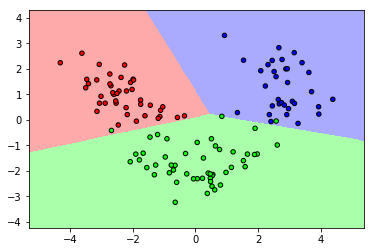

In [42]:
import matplotlib.pyplot as plt
Z=z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx,yy,Z,cmap=cmap_light)

plt.scatter(X_train_pca[:,0],X_train_pca[:,1],c=y_train,cmap=cmap_bold,edgecolor='k',s=20)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())



(-4.233073326734664, 4.286926673265154)

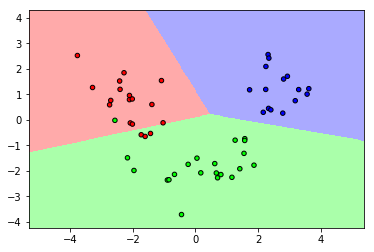

In [43]:
Z=z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx,yy,Z,cmap=cmap_light)
plt.scatter(X_test_pca[:,0],X_test_pca[:,1],c=y_test,cmap=cmap_bold,edgecolor='k',s=20)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())

In [44]:
X=wine.data
y=wine.target
print('Class label:',np.unique(y))

Class label: [0 1 2]


In [45]:
sc=StandardScaler()
sc.fit(X)
X_std=sc.transform(X)

X_train,X_test,y_train,y_test=train_test_split(
X_std,y,test_size=0.3,random_state=0,stratify=y)

In [46]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train,y_train)
X_test_lda = lda.transform(X_test)

In [47]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100.0,random_state=1)
lr.fit(X_train_lda,y_train)

print(lr.coef_)

[[-4.43023644  4.7480263 ]
 [-0.02001843 -5.50859628]
 [ 3.73815129  5.05169266]]


In [48]:
y_train_pred=lr.predict(X_train_lda)
y_test_pred=lr.predict(X_test_lda)

In [49]:
from matplotlib.colors import ListedColormap
cmap_light=ListedColormap(['#FFAAAA','#AAFFAA','#AAAAFF'])
cmap_bold=ListedColormap(['#FF0000','#00FF00','#0000FF'])
x_min,x_max=X_train_lda[:,0].min()-1,X_train_lda[:,0].max()+1
y_min,y_max=X_train_lda[:,1].min()-1,X_train_lda[:,1].max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,.02),
                 np.arange(y_min,y_max,.02))
z=lr.predict(np.c_[xx.ravel(),yy.ravel()])


(-6.0612416259719355, 4.578758374027838)

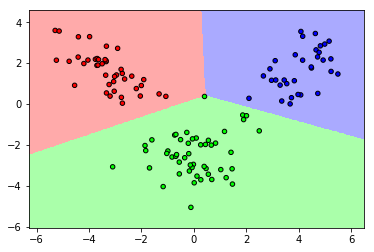

In [50]:
Z=z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx,yy,Z,cmap=cmap_light)

plt.scatter(X_train_lda[:,0],X_train_lda[:,1],c=y_train,cmap=cmap_bold,edgecolor='k',s=20)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())


(-6.0612416259719355, 4.578758374027838)

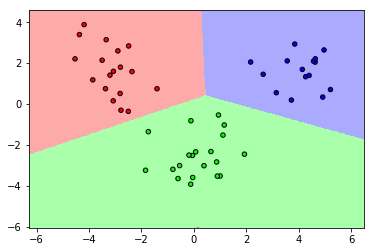

In [51]:
Z=z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx,yy,Z,cmap=cmap_light)
plt.scatter(X_test_lda[:,0],X_test_lda[:,1],c=y_test,cmap=cmap_bold,edgecolor='k',s=20)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())